# Automated API Extraction(Crypto Currency)

In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'd4fdc41e-7259-4bd3-9cbd-359978b420d8',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-04-28T22:26:25.813Z', 'error_code': 0, 'error_message': None, 'elapsed': 23, 'credit_count': 1, 'notice': None, 'total_count': 9837}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11018, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [4]:
import pandas as pd

pd.set_option('display.max.columns',None)

In [5]:
df = pd.json_normalize(data['data'])

df['timestamp'] = pd.to_datetime('now')

df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11018,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.969153e+07,1.969153e+07,False,NaN,1,NaN,NaN,None,2024-04-28T22:25:00.000Z,63459.194983,1.583743e+10,-19.2089,-0.312024,0.290209,-2.328073,-8.890139,3.642529,47.186560,1.249609e+12,52.7413,1.332643e+12,None,2024-04-28T22:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-29 00:26:52.817348
1,1027,Ethereum,ETH,ethereum,8875,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.220531e+08,1.220531e+08,True,NaN,2,NaN,NaN,None,2024-04-28T22:24:00.000Z,3306.019817,1.087591e+10,-7.4411,-0.023022,1.816400,4.656404,-5.526621,-1.120431,42.874466,4.035098e+11,17.0302,4.035098e+11,None,2024-04-28T22:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-29 00:26:52.817348
2,825,Tether USDt,USDT,tether,84294,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,1.105629e+11,1.130866e+11,True,NaN,3,NaN,NaN,None,2024-04-28T22:24:00.000Z,0.999666,3.412399e+10,-16.3895,0.004524,0.023339,-0.051038,-0.077657,-0.077758,-0.047763,1.105260e+11,4.6648,1.130488e+11,None,2024-04-28T22:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-29 00:26:52.817348
3,1839,BNB,BNB,bnb,2152,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475880e+08,1.475880e+08,False,NaN,4,NaN,NaN,None,2024-04-28T22:24:00.000Z,603.970072,6.562613e+08,-16.9876,-0.490510,1.542248,3.987195,-2.114148,46.809249,94.687789,8.913871e+10,3.7621,8.913871e+10,None,2024-04-28T22:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-29 00:26:52.817348
4,5426,Solana,SOL,solana,655,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.472842e+08,5.749169e+08,True,NaN,5,NaN,NaN,None,2024-04-28T22:24:00.000Z,140.815558,1.861987e+09,-24.1102,-0.467217,0.329632,-6.063785,-26.153438,20.321477,38.809386,6.298457e+10,2.6583,8.095725e+10,None,2024-04-28T22:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-29 00:26:52.817348
5,3408,USDC,USDC,usd-coin,18743,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.349806e+10,3.349806e+10,False,NaN,6,NaN,NaN,None,2024-04-28T22:24:00.000Z,1.000004,3.746926e+09,-23.7848,0.005201,0.001783,-0.005871,0.001071,0.005257,-0.019081,3.349818e+10,1.4138,3.349818e+10,None,2024-04-28T22:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-29 00:26:52.817348
6,52,XRP,XRP,xrp,1307,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.523591e+10,9.998765e+10,False,NaN,7,NaN,NaN,None,2024-04-28T22:25:00.000Z,0.516973,5.218367e+08,-31.7033,-0.186923,-0.214446,-1.828229,-17.465353,-10.123385,-3.935001,2.855545e+10,1.2052,5.169726e+10,None,2024-04-28T22:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-29 00:26:52.817348
7,74,Dogecoin,DOGE,dogecoin,958,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.440766e+11,1.440766e+11,True,NaN,8,NaN,NaN,None,2024-04-28T22:25:00.000Z,0.149148,5.809083e+08,-32.8867,-0.612093,1.418375,-6.220308,-29.780923,29.187878,82.225535,2.148873e+10,0.9069,2.148873e+10,None,2024-04-28T22:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-29 00:26:52.817348
8,11419,Toncoin,TON,toncoin,302,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.

In [17]:
df = pd.DataFrame()

In [26]:
#This function is used to get the API from the website and write the data in a csv file
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'20',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'd4fdc41e-7259-4bd3-9cbd-359978b420d8',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])

    df['timestamp'] = pd.to_datetime('now')

    df 
    
    
    if not os.path.isfile(r'C:\Users\delig\Python Scripts\API.csv'):
        df.to_csv(r'C:\Users\delig\Python Scripts\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\delig\Python Scripts\API.csv', mode= 'a', header = False)

In [27]:
#This code will add new data to the csv everyday as long as its running and my computer is up
import os
from time import time
from time import sleep


for cash in range(333):
    api_runner()
    print('API runner completed successfully')
    sleep(86400)#sleep for every 24 hours
exit()

API runner completed successfully
API runner completed successfully


KeyboardInterrupt: 

In [24]:
#pd.set_option('display.max.rows',200)

In [28]:
df10 = pd.read_csv(r'C:\Users\delig\Python Scripts\API.csv')

df10

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11018,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.969153e+07,1.969153e+07,False,NaN,1,NaN,NaN,NaN,2024-04-28T23:16:00.000Z,62906.629410,1.685777e+10,-13.2085,-0.901896,-0.791651,-3.205444,-9.945987,0.907415,45.941983,1.238728e+12,52.7447,1.321039e+12,NaN,2024-04-28T23:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-29 01:16:47.950717
1,1,1027,Ethereum,ETH,ethereum,8875,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.220531e+08,1.220531e+08,True,NaN,2,NaN,NaN,NaN,2024-04-28T23:15:00.000Z,3274.597235,1.115656e+10,-4.5104,-0.813913,0.770402,4.007718,-6.922673,-2.611218,41.597660,3.996746e+11,17.0248,3.996746e+11,NaN,2024-04-28T23:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-29 01:16:47.950717
2,2,825,Tether USDt,USDT,tether,84295,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,1.105629e+11,1.130866e+11,True,NaN,3,NaN,NaN,NaN,2024-04-28T23:15:00.000Z,0.999677,3.545739e+10,-12.1508,0.006428,0.042335,-0.057703,-0.078876,-0.102598,-0.041505,1.105271e+11,4.7081,1.130500e+11,NaN,2024-04-28T23:15:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-29 01:16:47.950717
3,3,1839,BNB,BNB,bnb,2152,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.475880e+08,1.475880e+08,False,NaN,4,NaN,NaN,NaN,2024-04-28T23:15:00.000Z,599.055646,6.703736e+08,-13.7713,-0.847077,0.764672,3.361903,-2.957417,44.869714,93.250980,8.841340e+10,3.7661,8.841340e+10,NaN,2024-04-28T23:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-29 01:16:47.950717
4,4,5426,Solana,SOL,solana,655,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.472842e+08,5.749169e+08,True,NaN,5,NaN,NaN,NaN,2024-04-28T23:15:00.000Z,138.423918,1.917642e+09,-19.2477,-1.530008,-1.926875,-6.751016,-28.012393,19.210066,37.320142,6.191483e+10,2.6374,7.958225e+10,NaN,2024-04-28T23:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-29 01:16:47.950717
5,5,3408,USDC,USDC,usd-coin,18743,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.349806e+10,3.349806e+10,False,NaN,6,NaN,NaN,NaN,2024-04-28T23:15:00.000Z,1.000049,3.924595e+09,-18.7134,0.010037,0.017845,-0.004845,0.006392,0.010317,-0.008708,3.349969e+10,1.4264,3.349969e+10,NaN,2024-04-28T23:15:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-29 01:16:47.950717
6,6,52,XRP,XRP,xrp,1307,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.523591e+10,9.998765e+10,False,NaN,7,NaN,NaN,NaN,2024-04-28T23:16:00.000Z,0.510349,5.557804e+08,-26.2891,-1.222683,-1.542600,-2.828968,-19.045180,-11.067245,-4.656231,2.818957e+10,1.2008,5.103486e+10,NaN,2024-04-28T23:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-29 01:16:47.950717
7,7,74,Dogecoin,DOGE,dogecoin,958,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.440766e+11,1.440766e+11,True,NaN,8,NaN,NaN,NaN,2024-04-28T23:16:00.000Z,0.146908,6.065570e+08,-28.2635,-1.465173,-0.378993,-7.040532,-30.714463,24.701116,80.247611,2.116598e+10,0.9016,2.116598e+10,NaN,2024-04-28T23:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-29 01:16:47.950717
8,8,11419,Toncoin,TON,toncoin,302,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate

In [29]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [30]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11018,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19691534.00000,19691534.00000,False,NaN,1,NaN,NaN,None,2024-04-28T23:16:00.000Z,62906.62941,16857772635.82111,-13.20850,-0.90190,-0.79165,-3.20544,-9.94599,0.90742,45.94198,1238728031852.12109,52.74470,1321039217609.68994,None,2024-04-28T23:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-29 01:17:52.509837
1,1027,Ethereum,ETH,ethereum,8875,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122053053.89609,122053053.89609,True,NaN,2,NaN,NaN,None,2024-04-28T23:15:00.000Z,3274.59724,11156558125.85690,-4.51040,-0.81391,0.77040,4.00772,-6.92267,-2.61122,41.59766,399674592811.58569,17.02480,399674592811.59003,None,2024-04-28T23:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-29 01:17:52.509837
2,825,Tether USDt,USDT,tether,84295,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,110562912301.67532,113086550461.62344,True,NaN,3,NaN,NaN,None,2024-04-28T23:15:00.000Z,0.99968,35457391759.63932,-12.15080,0.00643,0.04234,-0.05770,-0.07888,-0.10260,-0.04150,110527148266.73744,4.70810,113049970099.75000,None,2024-04-28T23:15:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-29 01:17:52.509837
3,1839,BNB,BNB,bnb,2152,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147587958.06466,147587958.06466,False,NaN,4,NaN,NaN,None,2024-04-28T23:15:00.000Z,599.05565,670373615.59725,-13.77130,-0.84708,0.76467,3.36190,-2.95742,44.86971,93.25098,88413399493.96817,3.76610,88413399493.97000,None,2024-04-28T23:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-29 01:17:52.509837
4,5426,Solana,SOL,solana,655,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,447284162.07663,574916928.09863,True,NaN,5,NaN,NaN,None,2024-04-28T23:15:00.000Z,138.42392,1917641790.29287,-19.24770,-1.53001,-1.92687,-6.75102,-28.01239,19.21007,37.32014,61914826396.30975,2.63740,79582253997.69000,None,2024-04-28T23:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-29 01:17:52.509837
5,3408,USDC,USDC,usd-coin,18743,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33498062143.36596,33498062143.36596,False,NaN,6,NaN,NaN,None,2024-04-28T23:15:00.000Z,1.00005,3924594763.53654,-18.71340,0.01004,0.01784,-0.00485,0.00639,0.01032,-0.00871,33499690807.33009,1.42640,33499690807.33000,None,2024-04-28T23:15:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-29 01:17:52.509837
6,52,XRP,XRP,xrp,1307,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55235913166.00000,99987652657.00000,False,NaN,7,NaN,NaN,None,2024-04-28T23:16:00.000Z,0.51035,555780381.86542,-26.28910,-1.22268,-1.54260,-2.82897,-19.04518,-11.06725,-4.65623,28189573654.99194,1.20080,51034864889.94000,None,2024-04-28T23:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-29 01:17:52.509837
7,74,Dogecoin,DOGE,dogecoin,958,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,144076586383.70523,144076586383.70523,True,NaN,8,NaN,NaN,None,2024-04-28T23:16:00.000Z,0.14691,606557038.29579,-28.26350,-1.46517,-0.37899,-7.04053,-30.71446,24.70112,80.24761,21165979803.70916,0.90160,21165979803.71000,None,2024-04-28T23:16:00.00

In [31]:
#Using the Group by function so that our data looks neat
df3 = df.groupby('name', sort= False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()

df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.90190,-0.79165,-3.20544,-9.94599,0.90742,45.94198
Ethereum,-0.81391,0.77040,4.00772,-6.92267,-2.61122,41.59766
Tether USDt,0.00643,0.04234,-0.05770,-0.07888,-0.10260,-0.04150
BNB,-0.84708,0.76467,3.36190,-2.95742,44.86971,93.25098
Solana,-1.53001,-1.92687,-6.75102,-28.01239,19.21007,37.32014
USDC,0.01004,0.01784,-0.00485,0.00639,0.01032,-0.00871
XRP,-1.22268,-1.54260,-2.82897,-19.04518,-11.06725,-4.65623
Dogecoin,-1.46517,-0.37899,-7.04053,-30.71446,24.70112,80.24761
Toncoin,-1.41437,0.63029,-11.17730,7.39059,113.60482,157.43563


In [33]:
da = df3.stack()

da

name                                           
Bitcoin            quote.USD.percent_change_1h     -0.90190
                   quote.USD.percent_change_24h    -0.79165
                   quote.USD.percent_change_7d     -3.20544
                   quote.USD.percent_change_30d    -9.94599
                   quote.USD.percent_change_60d     0.90742
                   quote.USD.percent_change_90d    45.94198
Ethereum           quote.USD.percent_change_1h     -0.81391
                   quote.USD.percent_change_24h     0.77040
                   quote.USD.percent_change_7d      4.00772
                   quote.USD.percent_change_30d    -6.92267
                   quote.USD.percent_change_60d    -2.61122
                   quote.USD.percent_change_90d    41.59766
Tether USDt        quote.USD.percent_change_1h      0.00643
                   quote.USD.percent_change_24h     0.04234
                   quote.USD.percent_change_7d     -0.05770
                   quote.USD.percent_change_30d    -

In [34]:
df5 = da.to_frame(name = 'values')

df5

values
name                                                    
Bitcoin           quote.USD.percent_change_1h   -0.90190
                  quote.USD.percent_change_24h  -0.79165
                  quote.USD.percent_change_7d   -3.20544
                  quote.USD.percent_change_30d  -9.94599
                  quote.USD.percent_change_60d   0.90742
                  quote.USD.percent_change_90d  45.94198
Ethereum          quote.USD.percent_change_1h   -0.81391
                  quote.USD.percent_change_24h   0.77040
                  quote.USD.percent_change_7d    4.00772
                  quote.USD.percent_change_30d  -6.92267
                  quote.USD.percent_change_60d  -2.61122
                  quote.USD.percent_change_90d  41.59766
Tether USDt       quote.USD.percent_change_1h    0.00643
                  quote.USD.percent_change_24h   0.04234
                  quote.USD.percent_change_7d   -0.05770
                  quote.USD.percent_change_30d  -0.07888
                  quote.USD.percent_change_60d  -0.10260
                  quote.USD.percent_change_90d  -0.04150
BNB               quote.USD.percent_change_1h   -0.84708
                  quote.USD.percent_change_24h   0.76467
                  quote.USD.percent_change_7d    3.36190
                  quote.USD.percent_change_30d  -2.95742
                  quote.USD.percent_change_60d  44.86971
                  quote.USD.percent_change_90d  93.25098
Solana            quote.USD.percent_change_1h   -1.53001
                  quote.USD.percent_change_24h  -1.92687
                  quote.USD.percent_change_7d   -6.75102
                  quote.USD.percent_change_30d -28.01239
                  quote.USD.percent_change_60d  19.21007
                  quote.USD.percent_change_90d  37.32014
USDC              quote.USD.percent_change_1h    0.01004
                  quote.USD.percent_change_24h   0.01784
                  quote.USD.percent_change_7d   -0.00485
                  quote.USD.percent_change_30d   0.00639
                  quote.USD.percent_change_60d   0.01032
                  quote.USD.percent_change_90d  -0.00871
XRP               quote.USD.percent_change_1h   -1.22268
                  quote.USD.percent_change_24h  -1.54260
                  quote.USD.percent_change_7d   -2.82897
                  quote.USD.percent_change_30d -19.04518
                  quote.USD.percent_change_60d -11.06725
                  quote.USD.percent_change_90d  -4.65623
Dogecoin          quote.USD.percent_change_1h   -1.46517
                  quote.USD.percent_change_24h  -0.37899
                  quote.USD.percent_change_7d   -7.04053
                  quote.USD.percent_change_30d -30.71446
                  quote.USD.percent_change_60d  24.70112
                  quote.USD.percent_change_90d  80.24761
Toncoin           quote.USD.percent_change_1h   -1.41437
                  quote.USD.percent_change_24h   0.63029
                  quote.USD.percent_change_7d  -11.17730
                  quote.USD.percent_change_30d   7.39059
                  quote.USD.percent_change_60d 113.60482
                  quote.USD.percent_change_90d 157.43563
Cardano           quote.USD.percent_change_1h   -1.18856
                  quote.USD.percent_change_24h  -0.61915
                  quote.USD.percent_change_7d   -7.47214
                  quote.USD.percent_change_30d -30.32977
                  quote.USD.percent_change_60d -26.52327
                  quote.USD.percent_change_90d -11.97507
Shiba Inu         quote.USD.percent_change_1h   -1.56424
                  quote.USD.percent_change_24h  -2.08879
                  quote.USD.percent_change_7d   -8.05340
                  quote.USD.percent_change_30d -21.62168
                  quote.USD.percent_change_60d 104.74395
                  quote.USD.percent_change_90d 162.86764
Avalanche         quote.USD.percent_change_1h   -1.78483
                  quote.USD.percent_change_24h  -0.83380
                  quote.USD.percent_change_7d   -8.21205
   

In [35]:
df5.count()

values    120
dtype: int64

In [36]:
index = pd.Index(range(120))

df6 = df5.reset_index()

df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.90190
1,Bitcoin,quote.USD.percent_change_24h,-0.79165
2,Bitcoin,quote.USD.percent_change_7d,-3.20544
3,Bitcoin,quote.USD.percent_change_30d,-9.94599
4,Bitcoin,quote.USD.percent_change_60d,0.90742
5,Bitcoin,quote.USD.percent_change_90d,45.94198
6,Ethereum,quote.USD.percent_change_1h,-0.81391
7,Ethereum,quote.USD.percent_change_24h,0.77040
8,Ethereum,quote.USD.percent_change_7d,4.00772
9,Ethereum,quote.USD.percent_change_30d,-6.92267


In [45]:
df7 = df6.rename(columns={'level_1':'percentage_change'})

df7

,name,percentage_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.90190
1,Bitcoin,quote.USD.percent_change_24h,-0.79165
2,Bitcoin,quote.USD.percent_change_7d,-3.20544
3,Bitcoin,quote.USD.percent_change_30d,-9.94599
4,Bitcoin,quote.USD.percent_change_60d,0.90742
5,Bitcoin,quote.USD.percent_change_90d,45.94198
6,Ethereum,quote.USD.percent_change_1h,-0.81391
7,Ethereum,quote.USD.percent_change_24h,0.77040
8,Ethereum,quote.USD.percent_change_7d,4.00772
9,Ethereum,quote.USD.percent_change_30d,-6.92267


In [48]:
df7['percentage_change'] = df7['percentage_change'].replace(['quote.USD.percent_change_1h'],['1h'])
df7['percentage_change'] =df7['percentage_change'].replace(['quote.USD.percent_change_24h'],['24h'])
df7['percentage_change'] =df7['percentage_change'].replace(['quote.USD.percent_change_7d'],['7d'])
df7['percentage_change'] =df7['percentage_change'].replace(['quote.USD.percent_change_30d'],['30d'])
df7['percentage_change'] =df7['percentage_change'].replace(['quote.USD.percent_change_60d'],['60d'])
df7['percentage_change'] =df7['percentage_change'].replace(['quote.USD.percent_change_90d'],['90d'])

In [49]:
df7

,name,percentage_change,values
0,Bitcoin,1h,-0.90190
1,Bitcoin,24h,-0.79165
2,Bitcoin,7d,-3.20544
3,Bitcoin,30d,-9.94599
4,Bitcoin,60d,0.90742
5,Bitcoin,90d,45.94198
6,Ethereum,1h,-0.81391
7,Ethereum,24h,0.77040
8,Ethereum,7d,4.00772
9,Ethereum,30d,-6.92267


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\delig\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


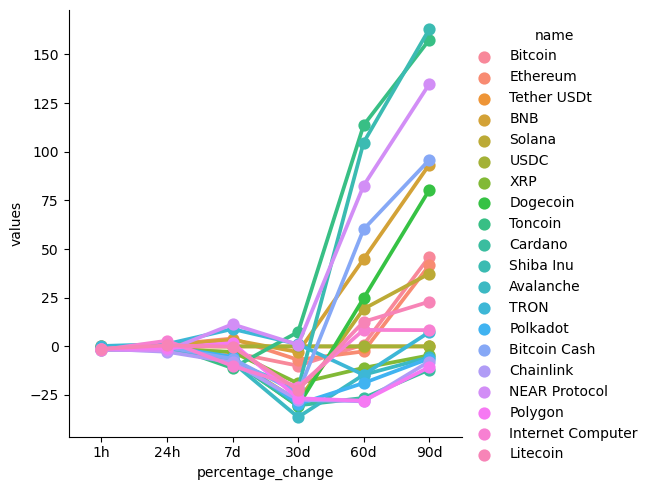

In [50]:
sns.catplot(x= 'percentage_change', y='values', hue='name', data = df7,kind='point')